In [1]:
"""
importing the modules 
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import e
import time
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

In [2]:
"""
creating the timestep-0 Scalar field
"""

ah = np.zeros((30,16))
df = pd.DataFrame(ah)
df[0] = [None] + [i for i in range(70,-75,-5)]
df.loc[0] = [None] + [i for i in range(-10,65,5)]

for r in range(1,30):
    for c in range(1,16):
        df.iloc[r,c] = 900*e**(-((df.iloc[r,0]/20)**2 + (df.iloc[0,c]/20)**2))

"""
constants that will be used
"""       
time_step = 100
change = 5 #x or y change between cells in the scalar field

winds_x = [0.01,0.01,0.01,0.01]
winds_y = [0.008,0.009,0.011,0.012]

"""
defining a core function that creates a new scalar field given the old scalar field and wind speeds as inputs
"""

def get_new_df(old_df,wind_x,wind_y):
    tab = np.zeros((30,16))
    new_df = pd.DataFrame(tab)
    new_df[0] = [None] + [i for i in range(70,-75,-5)]
    new_df.loc[0] = [None] + [i for i in range(-10,65,5)]
    
    for col in range(2,16):
        new_df.iloc[29,col] = old_df.iloc[29,col] - time_step*(wind_x*(old_df.iloc[29,col]-old_df.iloc[29,col-1])/change + \
                                                          wind_y*(old_df.iloc[29,col]/change))
    for row in range(1,28):
        new_df.iloc[row,1] = old_df.iloc[row,1] - time_step*(wind_x*old_df.iloc[row,1]/change + \
                                                        wind_y*((old_df.iloc[row,1] - old_df.iloc[row+1,1])/change))
        
    new_df.iloc[29,1] = old_df.iloc[29,1] - time_step*(wind_x*old_df.iloc[29,1]/change + \
                                                  wind_y*(old_df.iloc[29,1]/change))
    
    for row in range(1,29):
        for col in range(2,16):
            new_df.iloc[row,col] = old_df.iloc[row,col] - time_step*(wind_x*(old_df.iloc[row,col]-old_df.iloc[row,col-1])/change + \
                                                                    wind_y*(old_df.iloc[row,col]-old_df.iloc[row+1,col])/change)
    return new_df


"""
-preparing dictionaries that store the scalar fields for all time steps for all wind scenarios; at the beggining all have a timestep-0 scalar field in it
-filling these dictionaries
"""

my_dictionary0 = {"df0":df}
my_dictionary1 = {"df0":df}
my_dictionary2 = {"df0":df}
my_dictionary3 = {"df0":df}

for i in range(1,60):
    my_dictionary0["df%s" %i] = get_new_df(my_dictionary0["df%s" %str(i-1)],winds_x[0],winds_y[0])
    my_dictionary1["df%s" %i] = get_new_df(my_dictionary1["df%s" %str(i-1)],winds_x[1],winds_y[1])
    my_dictionary2["df%s" %i] = get_new_df(my_dictionary2["df%s" %str(i-1)],winds_x[2],winds_y[2])
    my_dictionary3["df%s" %i] = get_new_df(my_dictionary3["df%s" %str(i-1)],winds_x[3],winds_y[3])
    

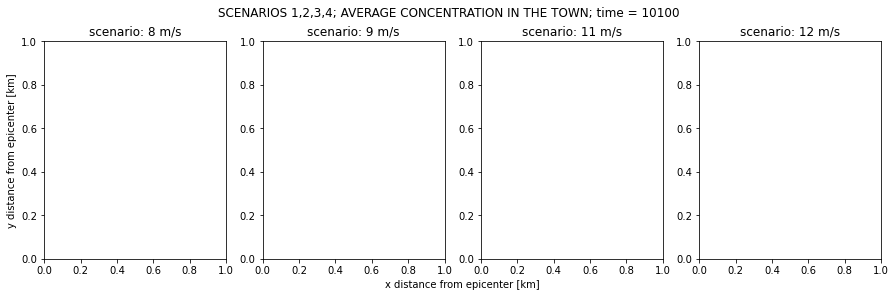

In [3]:
"""
creating figure with four plots
"""
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(15,4))

"""
setting common label for X and Y axes 
"""

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("x distance from epicenter [km]")
plt.ylabel("y distance from epicenter [km]")

plt.style.use('default')

"""
-setting the titles for individual plots and drawing rectangles in the place of the town
-preparing an array where the averages will be stored
"""

fig.suptitle('SCENARIOS 1,2,3,4; AVERAGE CONCENTRATION IN THE TOWN; time = ' + str((time_step+1)*100),y=1)
ax0.title.set_text('scenario: 8 m/s')
ax1.title.set_text('scenario: 9 m/s')
ax2.title.set_text('scenario: 11 m/s')
ax3.title.set_text('scenario: 12 m/s')

town0 = Rectangle((40,30),10, 20, facecolor='None', edgecolor='r', lw=1,zorder=10)
town1 = Rectangle((40,30),10, 20, facecolor='None', edgecolor='r', lw=1,zorder=10)
town2 = Rectangle((40,30),10, 20, facecolor='None', edgecolor='r', lw=1,zorder=10)
town3 = Rectangle((40,30),10, 20, facecolor='None', edgecolor='r', lw=1,zorder=10)

averages = [np.zeros(60),np.zeros(60),np.zeros(60),np.zeros(60)]

"""
-defining the animate(time_step) function, this function will be repeatedly called by the FuncAnimation object
-function animate(time_step) plots the four contour graphs and calculates the average values of concentration in the town
"""

def animate(time_step):
    fig.suptitle('SCENARIOS 1,2,3,4; AVERAGE CONCENTRATION IN THE TOWN; time = ' + str((time_step+1)*100),y=1)
    field0 = my_dictionary0["df%s" %time_step].iloc[1:30,1:16]
    field1 = my_dictionary1["df%s" %time_step].iloc[1:30,1:16]
    field2 = my_dictionary2["df%s" %time_step].iloc[1:30,1:16]
    field3 = my_dictionary3["df%s" %time_step].iloc[1:30,1:16]
    
    aver0 = round(field0.iloc[4:9,10:13].mean().mean())
    averages[0][time_step] = aver0
    ax0.title.set_text(str(aver0) + ' ppb')
    aver1 = round(field1.iloc[4:9,10:13].mean().mean())
    averages[1][time_step] = aver1
    ax1.title.set_text(str(aver1) + ' ppb')
    aver2 = round(field2.iloc[4:9,10:13].mean().mean())
    averages[2][time_step] = aver2
    ax2.title.set_text(str(aver2) + ' ppb')
    aver3 = round(field3.iloc[4:9,10:13].mean().mean())
    averages[3][time_step] = aver3
    ax3.title.set_text(str(aver3) + ' ppb')
    
    ax0.contourf([c for c in range(-10,65,5)],[c for c in range(-70,75,5)],field0.iloc[::-1])
    ax1.contourf([c for c in range(-10,65,5)],[c for c in range(-70,75,5)],field1.iloc[::-1])
    ax2.contourf([c for c in range(-10,65,5)],[c for c in range(-70,75,5)],field2.iloc[::-1])
    ax3.contourf([c for c in range(-10,65,5)],[c for c in range(-70,75,5)],field3.iloc[::-1])
    
    ax0.add_patch(town0)
    ax1.add_patch(town1)
    ax2.add_patch(town2)
    ax3.add_patch(town3)

In [4]:
"""
final_animation is the FuncAnimation object capable of exporting the animation
"""
plt.style.use('default')

final_animation = FuncAnimation(fig,animate,frames=60,interval=200,blit=False, repeat_delay = 1000)
final_animation.save('animation.gif',writer='pillow')

Text(0.5, 0.98, 'Average pollution of the town area')

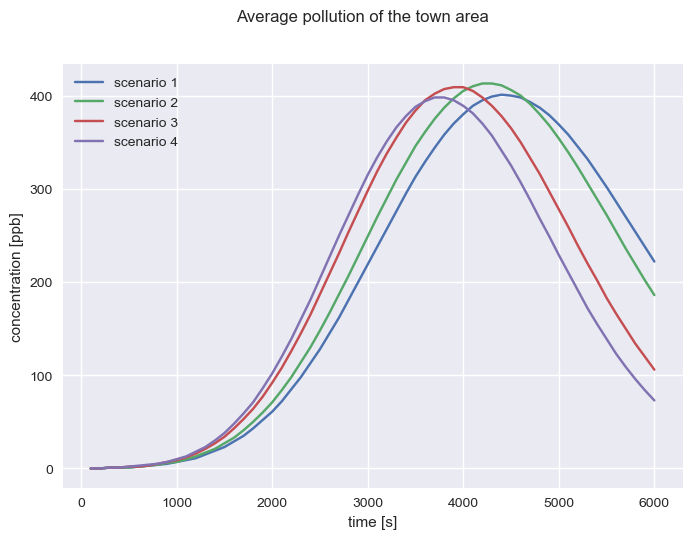

In [5]:
"""
-graph of average pollution in the town
-the averages need to be filled (therefore the above cell  must be ran before running this one)
"""
plt.style.use('seaborn')

figure2, axes = plt.subplots()
axes.set_xlabel("time [s]")
axes.set_ylabel("concentration [ppb]")
x = range(100,6100,100)
line0, = axes.plot(x,averages[0])
line1, = axes.plot(x,averages[1])
line2, = axes.plot(x,averages[2])
line3, = axes.plot(x,averages[3])

axes.legend([line0,line1,line2,line3],["scenario 1", "scenario 2", "scenario 3", "scenario 4"],loc="upper left")
figure2.suptitle("Average pollution of the town area")

In [9]:
"""
creating a live graph of the graph above
"""
plt.style.use('seaborn')

def update(num,x,y0,y1,y2,y3):
    line0.set_data(x[:num],y0[:num])
    line1.set_data(x[:num],y1[:num])
    line2.set_data(x[:num],y2[:num])
    line3.set_data(x[:num],y3[:num])

live_graph = FuncAnimation(figure2, update, fargs=[x, averages[0], averages[1], averages[2], averages[3]],interval=200,blit=False)
live_graph.save('live_graph_concentrations.gif',writer='pillow')